In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plot
import seaborn as sns
from textblob import TextBlob


In [3]:
from google.colab import files
uploaded = files.upload()

Saving student_feedback.csv to student_feedback.csv


In [4]:
df = pd.read_csv("student_feedback.csv")
df.head()

,Unnamed: 0,Student ID,Well versed with the subject,Explains concepts in an understandable way,Use of presentations,Degree of difficulty of assignments,Solves doubts willingly,Structuring of the course,Provides support for students going above and beyond,Course recommendation based on relevance
0,0,340,5,2,7,6,9,2,1,8
1,1,253,6,5,8,6,2,1,2,9
2,2,680,7,7,6,5,4,2,3,1
3,3,806,9,6,7,1,5,9,4,6
4,4,632,8,10,8,4,6,6,9,9


In [5]:
df.columns

Index(['Unnamed: 0', 'Student ID', 'Well versed with the subject',
       'Explains concepts in an understandable way', 'Use of presentations',
       'Degree of difficulty of assignments', 'Solves doubts willingly',
       'Structuring of the course',
       'Provides support for students going above and beyond',
       'Course recommendation based on relevance'],
      dtype='object')

In [7]:
df.rename(columns={
    'Well versed with the subject': 'Subject_Knowledge',
    'Explains concepts in an understandable way': 'Concept_Clarity',
    'Use of presentations': 'Presentations',
    'Degree of difficulty of assignments': 'Assignment_Difficulty',
    'Solves doubts willingly': 'Doubt_Solving',
    'Structuring of the course': 'Course_Structure',
    'Provides support for students going above and beyond': 'Student_Support',
    'Course recommendation based on relevance': 'Course_Relevance'
}, inplace=True)

In [8]:
df.columns

Index(['Unnamed: 0', 'Student ID', 'Subject_Knowledge', 'Concept_Clarity',
       'Presentations', 'Assignment_Difficulty', 'Doubt_Solving',
       'Course_Structure', 'Student_Support', 'Course_Relevance'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Unnamed: 0             1001 non-null   int64
 1   Student ID             1001 non-null   int64
 2   Subject_Knowledge      1001 non-null   int64
 3   Concept_Clarity        1001 non-null   int64
 4   Presentations          1001 non-null   int64
 5   Assignment_Difficulty  1001 non-null   int64
 6   Doubt_Solving          1001 non-null   int64
 7   Course_Structure       1001 non-null   int64
 8   Student_Support        1001 non-null   int64
 9   Course_Relevance       1001 non-null   int64
dtypes: int64(10)
memory usage: 78.3 KB
None
        Unnamed: 0   Student ID  Subject_Knowledge  Concept_Clarity  \
count  1001.000000  1001.000000        1001.000000      1001.000000   
mean    500.000000   500.000000           7.497502         6.081918   
std     289.108111   289.108111    

/tmp/ipython-input-9-2747746708.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_feedback.index, y=avg_feedback.values, palette='Blues_d')
/tmp/ipython-input-9-2747746708.py:17: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


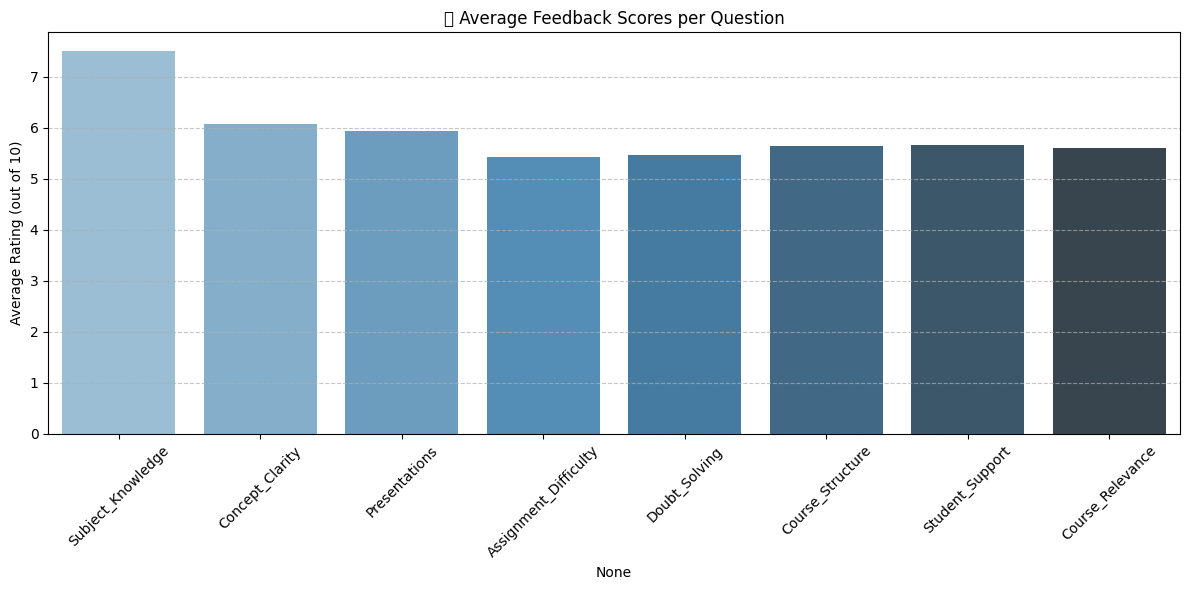

In [9]:
print(df.info())
print(df.describe())
feedback_cols = [
    'Subject_Knowledge', 'Concept_Clarity', 'Presentations',
    'Assignment_Difficulty', 'Doubt_Solving',
    'Course_Structure', 'Student_Support', 'Course_Relevance'
]
avg_feedback = df[feedback_cols].mean()
print("Average Feedback Scores:\n", avg_feedback)

plt.figure(figsize=(12,6))
sns.barplot(x=avg_feedback.index, y=avg_feedback.values, palette='Blues_d')
plt.title("📊 Average Feedback Scores per Question")
plt.xticks(rotation=45)
plt.ylabel("Average Rating (out of 10)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [10]:
top3 = avg_feedback.sort_values(ascending=False).head(3)
bottom3 = avg_feedback.sort_values().head(3)

print("\nTop 3 Feedback Aspects:\n", top3)
print("\nBottom 3 Feedback Aspects:\n", bottom3)


Top 3 Feedback Aspects:
 Subject_Knowledge    7.497502
Concept_Clarity      6.081918
Presentations        5.942058
dtype: float64

Bottom 3 Feedback Aspects:
 Assignment_Difficulty    5.430569
Doubt_Solving            5.474525
Course_Relevance         5.598402
dtype: float64


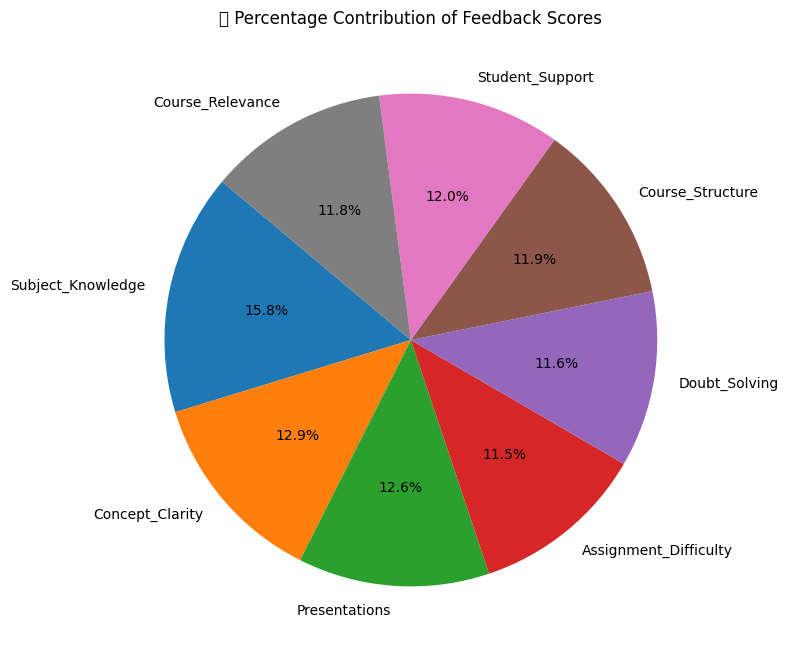

In [11]:
plt.figure(figsize=(8,8))
plt.pie(avg_feedback, labels=avg_feedback.index, autopct='%1.1f%%', startangle=140)
plt.title("📊 Percentage Contribution of Feedback Scores")
plt.show()